Compute the histogram of the image coins.png, by finding the frequency of pixels for each intensity level {0, 1, . . . , 255}. Show the histogram by plotting frequencies
w.r.t. intensity levels. Comment on what you observe. Also, find the average intensity of the image
using this histogram. Verify the result with the actual average intensity.

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [167]:
image=Image.open("C:\\Users\\Gaurav Talekar\\Dip data\\coins.png")

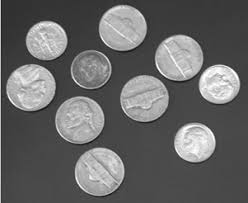

In [168]:
image

In [169]:
gray_image=image.convert("L")

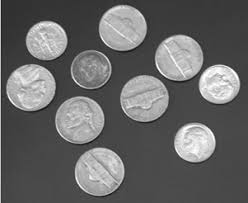

In [170]:
gray_image

In [171]:
image_array=np.array(gray_image)

In [172]:
image_array

array([[192,  30,  50, ...,  57,  57,  57],
       [192,  30,  50, ...,  57,  57,  57],
       [192,  30,  50, ...,  57,  57,  57],
       ...,
       [194,  54,  69, ...,  71,  72,  72],
       [194,  54,  69, ...,  71,  72,  72],
       [194,  54,  69, ...,  71,  72,  72]], dtype=uint8)

In [173]:
hist=np.histogram(image_array,bins=256,range=(0,256))[0]

In [174]:
hist

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          1,    0,    0,    0,    0,    1,    0,    0,    0,    0,    3,
          3,    1,    2,    4,    5,    3,    4,    3,   20,   11,    5,
         18,   20,   26,   10,   16,   11,   17,   27,   22,   24,   24,
         29,   45,   58,   49,   67,  240,  438,  218,  673,  476,  613,
        604,  562,  965, 1271, 1327,  588, 1127, 1286,  858,  989, 1004,
       1259,  901,  959,  678, 1289, 2056, 3480, 2511, 3285, 2178,  751,
        142,  120,   75,   63,   68,   42,   50,   27,   25,   23,   11,
         24,   28,   15,   27,   27,   20,   16,   16,   26,   21,   17,
         16,   26,   24,   25,   23,   33,   36,   36,   28,   25,   43,
         28,   42,   32,   37,   36,   37,   34,   44,   28,   31,   34,
         42,   31,   50,   39,   38,   38,   44,   47,   42,   34,   43,
         44,   42,   49,   45,   48,   53,   51,   58,   47,   60,   46,
         44,   46,   71,   59,   75,   71,   71,   

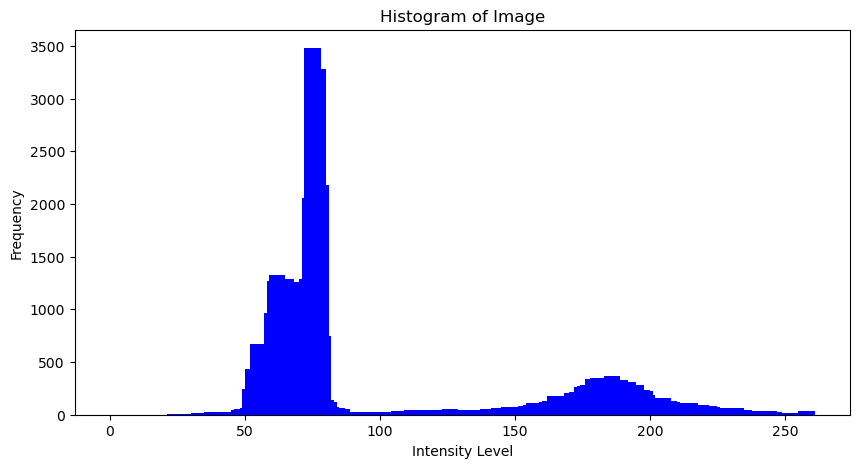

In [175]:
plt.figure(figsize=(10, 5))
plt.bar(range(256), hist, width=6, align='edge',color='b')
plt.xlabel('Intensity Level')
plt.ylabel('Frequency')
plt.title('Histogram of Image')
plt.show()

In [176]:
total_pixels=image_array.size

In [177]:
intensity_levels=np.arange(256)

In [178]:
avg_intensity= np.sum(hist*intensity_levels)/total_pixels

In [179]:
avg_intensity

103.30500158906722

In [180]:
actual_avg_intensity=np.mean(image_array)

In [181]:
actual_avg_intensity

103.30500158906722

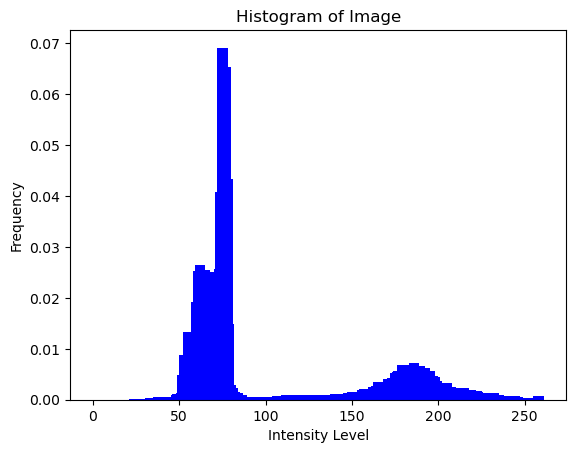

In [182]:
normalized_histogram=hist/total_pixels
plt.bar(range(256),normalized_histogram, width=6, align='edge',color='b')
plt.xlabel('Intensity Level')
plt.ylabel('Frequency')
plt.title('Histogram of Image')
plt.show()

Otsu’s Binarization: In the class, we showed that σ
2
w(t) + σ
2
b
(t) = σ
2
T
, where t is the threshold
for binarization. Binarize the image coins.png by finding the optimal threshold t by:
(a) Minimizing the within class variance σ
2
w(t) over t.
(b) Maximizing the between class variance σ
2
b
(t) over t.
Verify that both methods are equivalent. Compare the time taken by each of the approaches.

C:\Users\Gaurav Talekar\AppData\Local\Temp\ipykernel_1776\684193704.py:23: RuntimeWarning: invalid value encountered in scalar divide
  mean = [np.sum(mean_array[:threshold+1]) / w[0], np.sum(mean_array[threshold+1:]) / w[1]]
C:\Users\Gaurav Talekar\AppData\Local\Temp\ipykernel_1776\684193704.py:30: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sigma = [np.sum(((intensity - mean[0]) ** 2) * hist[intensity] for intensity in range(threshold + 1)) / (w[0] * total_pixels),
C:\Users\Gaurav Talekar\AppData\Local\Temp\ipykernel_1776\684193704.py:31: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  np.sum(((intensity - mean[1]) ** 2) * hist[intensity] for intensity in range(threshold + 1, 256)) / (w[1] * total_pixels)]
C:\Users\Gau

 Time taken for between class variance:0.010275125503540039
 Time taken for within class variance:0.04404616355895996
Threshold (between-class variance): 125
Threshold (within-class variance): 125


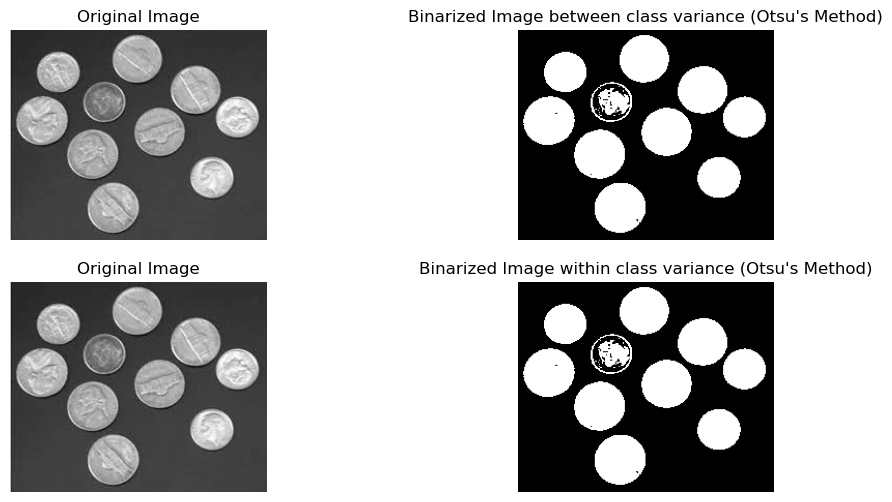

In [187]:
image_path="C:\\Users\\Gaurav Talekar\\Dip data\\coins.png"
image=Image.open(image_path)
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time
def weight(hist, threshold):
    w = np.zeros(2)
    w[0] = np.sum(hist[:threshold + 1])
    w[1] = np.sum(hist[threshold + 1:])
    return w

def calculate_histogram(image_path):
    image = Image.open(image_path)
    image_array = np.array(image)
    hist = np.histogram(image_array, bins=256, range=(0, 256))[0]
    return hist

def calculate_means(hist, threshold):
    intensity_levels = np.arange(256)
    w = weight(hist, threshold)
    mean_array = np.multiply(intensity_levels, hist)
    mean = [np.sum(mean_array[:threshold+1]) / w[0], np.sum(mean_array[threshold+1:]) / w[1]]
    return mean

def calculate_variance(hist, threshold):
    total_pixels = np.sum(hist)
    w = weight(hist, threshold)
    mean = calculate_means(hist, threshold)
    sigma = [np.sum(((intensity - mean[0]) ** 2) * hist[intensity] for intensity in range(threshold + 1)) / (w[0] * total_pixels),
             np.sum(((intensity - mean[1]) ** 2) * hist[intensity] for intensity in range(threshold + 1, 256)) / (w[1] * total_pixels)]
    return sigma

def within_class_variance(hist, threshold):
    total_pixels = np.sum(hist)
    w = weight(hist, threshold)
    sigma = calculate_variance(hist, threshold)
    within_class_variance = (w[0] * sigma[0] + w[1] * sigma[1]) / total_pixels
    return within_class_variance

def between_class_variance(hist, threshold):
    total_pixels = np.sum(hist)
    w = weight(hist, threshold)
    mean = calculate_means(hist, threshold)
    between_class_variance = (w[0] * w[1] * (mean[0] - mean[1]) ** 2) / (total_pixels ** 2)
    return between_class_variance

def otsu_binarization_b(image_path):
    hist = calculate_histogram(image_path)
    start_time=time.time()
    t = np.nanargmax([between_class_variance(hist, i) for i in range(0, 256)])
    end_time=time.time()
    between_class_time=end_time-start_time
    
    start_time=time.time()
    t1=np.nanargmin([within_class_variance(hist,i) for i in range(0,256)])
    end_time=time.time()
    within_class_time=end_time-start_time
    
    print(f" Time taken for between class variance:{between_class_time}")
    print(f" Time taken for within class variance:{within_class_time}")
    print("Threshold (between-class variance):", t)
    print("Threshold (within-class variance):", t1)
    image = Image.open(image_path)
    image_array = np.array(image)
    binarize = lambda x: 1 if x >= t else 0
    binarize1 = lambda x: 1 if x >= t1 else 0
    vector_binarize = np.vectorize(binarize)
    vector_binarize1 = np.vectorize(binarize1)
    image_bin = vector_binarize(image_array)
    image_bin2 = vector_binarize1(image_array)

    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(221)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Binarized Image
    plt.subplot(222)
    plt.imshow(image_bin, cmap='gray')
    plt.title('Binarized Image between class variance (Otsu\'s Method)')
    plt.axis('off')
    
    plt.subplot(223)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    
    plt.subplot(224)
    plt.imshow(image_bin2, cmap='gray')
    plt.title('Binarized Image within class variance (Otsu\'s Method)')
    plt.axis('off')
    plt.show()
    
    
    return image_bin







image_path="C:\\Users\\Gaurav Talekar\\Dip data\\coins.png"
binarized_image = otsu_binarization_b(image_path)



    
    
    
    
    

Connected Components: Binarize the image quote.png and count the total number of characters excluding punctuations using connected component analysis.

In [227]:
import cv2
import numpy as np

def binarize_and_count_characters(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply thresholding to binarize the image
    _, binary_img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
    
    # Find connected components in the binary image
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_img, connectivity=8)
    
    # Initialize a set to store punctuations
    punctuations = set("!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~")
    
    # Initialize a variable to count characters excluding punctuations
    char_count = 0
    
    # Loop through the connected components
    for i, stat in enumerate(stats):
        # Exclude small components (noise) and the background
        if stat[4] > 100 and i != 0:
            # Get the bounding box for the component
            x, y, w, h = stat[0], stat[1], stat[2], stat[3]
            
            # Extract the region of interest (character)
            roi = img[y:y+h, x:x+w]
            
            # Compute the mean intensity of the character region
            mean_intensity = np.mean(roi)
            
            # Check if the character is not a punctuation based on intensity
            if mean_intensity > 128:
                char_count += 1

    return char_count

# Replace 'quote.png' with the path to your image file
image_path="C:\\Users\\Gaurav Talekar\\Dip data\\quote.png"
total_characters = binarize_and_count_characters(image_path)
print(f"Total characters (excluding punctuations): {total_characters}")


Total characters (excluding punctuations): 60


Depth based Extraction: The image IIScTextDepth.png is an inverse depth map of IIScText.png.
A depth map indicates the depth of an object from the camera for each pixel. Particularly,
an inverse depth map has a higher value when the object is nearer to the camera and a lower
value when it is farther apart. Binarize the inverse depth map IIScTextDepth.png and use
that information to extract the text in IIScText.png and display it over the background image
IIScMainBuilding.png. The expected image is shown below.


In [184]:
import cv2

In [215]:
import cv2
import numpy as np

def extract_text_from_depth_map(depth_map_path, text_image_path, background_image_path, output_image_path):
    
    depth_map = cv2.imread(depth_map_path, cv2.IMREAD_GRAYSCALE)
    text_image = cv2.imread(text_image_path)
    background_image = cv2.imread(background_image_path)

    
    threshold_value = 160 
    _, binary_depth_map = cv2.threshold(depth_map, threshold_value, 255, cv2.THRESH_BINARY)

   
    mask = cv2.cvtColor(binary_depth_map, cv2.COLOR_GRAY2BGR)

    
    extracted_text = cv2.bitwise_and(text_image, mask)

    
    inverted_mask = cv2.bitwise_not(mask)
    extracted_background = cv2.bitwise_and(background_image, inverted_mask)

   
    result = cv2.add(extracted_text, extracted_background)

    cv2.imwrite(output_image_path, result)

  
    cv2.imshow("Output Image", result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

depth_map_path = "C:\\Users\\Gaurav Talekar\\Dip data\\IIScTextDepth.png"
text_image_path = "C:\\Users\\Gaurav Talekar\\Dip data\\IIScText.png"
background_image_path = "C:\\Users\\Gaurav Talekar\\Dip data\\IIScMainBuilding.png"
output_image_path = "C:\\Users\\Gaurav Talekar\\Dip data\\output_manual.png"
extract_text_from_depth_map(depth_map_path, text_image_path, background_image_path, output_image_path)
